<a href="https://colab.research.google.com/github/Alecia113/NLP-Ex/blob/main/Ex5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E1. Briefly describe the difference between Stemming and Lemmatisation.
Please write down your answer below in your own words with **examples**

Your answer: Stemming 是去除先后坠取词根。 Lemmatisation 过去式，复数，比较级找原型。（粗浅理解）

## E2. Preprocessing and Model Saving
In this exercise, you are to preprocess the train and test data, and apply different pre-trained embeddings.

**Note**: We won't mark your exercise based on the test set performance, we will only check whether the preprocessing part and embedding part are correct.
注意：我们不会根据测试集的性能给你的练习打分，我们只检查预处理部分和嵌入部分是否正确。


In [1]:
#precrocessing part + embedding part (correct)

In [1]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 

### Download Dataset

In [14]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '1gNfBqguzBu8cHKMPc8C44GbvD443dNC5'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('twitter.csv')  

import pandas as pd
df = pd.read_csv("twitter.csv")
df_pick = df.sample(400,random_state=24)

raw_text = df_pick["Text"].tolist()
raw_label = df_pick["Label"].tolist()

from sklearn.model_selection import train_test_split
text_train,text_test,label_train,label_test = train_test_split(raw_text,raw_label,test_size=0.25,random_state=42) #test_size=0.25表示取了四分之一的数据来测试模型

#Test

In [4]:
len(label_train)#300

300

In [15]:
len(label_test) #100

100

In [6]:
len(text_train)#300

300

In [7]:
len(text_test)  #100

100

In [8]:
df  #16202 rows × 6 columns

,Unnamed: 0,Tweet_ID,Previous,User_ID,Text,Label
0,0,567080871472017408,5.670786e+17,2941145694,@truaemusic The followers of the religion give...,racism
1,1,566098518616449024,5.660874e+17,2941145694,@Love___Egypt @washingtonpost All the land tha...,racism
2,2,554672350361571328,NaN,2941145694,@CamilleHughes16 @edbarber101658 @_Watch_Obser...,racism
3,3,569878129772081153,5.698451e+17,2941145694,@KellyTurner99 @brushyblues @buellerishere The...,racism
4,4,568541747849998337,NaN,2941145694,@buellerishere Who cares. ISIS does what Moham...,racism
...,...,...,...,...,...,...
16197,16197,571505156325392384,5.715047e+17,13857342,@scaryjen @Alfuriuskj @Nayadrikj undead 4ever.,none
16198,16198,572338390630154240,NaN,2438299764,"Here's a suggestion, let's make Manu and Colin...",none
16199,16199,574763524297117696,5.747632e+17,2941145694,@ardiem1m @Alfonso_AraujoG @MaxBlumenthal @old...,none
16200,16200,572335728392208384,NaN,126292381,Oh I knew it. Fuuuck. More restaurants. Ok I s...,none


In [9]:
df_pick #400 rows × 6 columns 

,Unnamed: 0,Tweet_ID,Previous,User_ID,Text,Label
8875,8875,575595916066861056,NaN,573660240,#MKR always needs an evil team for ratings. Ka...,none
1583,1583,566494631513178113,5.664927e+17,2941145694,@discerningmumin Islam is a pile of manure tha...,racism
1269,1269,555151223276331008,5.551128e+17,2941145694,@Salon @TheMuslimGuy So when the subject of Is...,racism
2009,2009,572328892419080193,NaN,2459169938,RT @Craigles60Craig: So do you think pink undi...,sexism
6505,6505,566479391098957824,5.664790e+17,13857342,@tarah @girlziplocked @hypatiadotca @justkelly...,none
...,...,...,...,...,...,...
11535,11535,572967035048611841,5.727425e+17,2941145694,@DianH4 LOL. The prophet was suppose to create...,none
4107,4107,562434124313792512,NaN,2756873076,RT @Feminazi_Front: @She_TheWolf @brotheryello...,sexism
11862,11862,451002787212820480,NaN,930620467,RT @beadsland: What find truly astounding is n...,none
1767,1767,576622046957871104,5.766202e+17,2941145694,"@dankmtl Again, idiot, none of that changes th...",racism


In [10]:
raw_text  
'''
 '@antizholim Tripple price, no customers.',
 '@BristolBen I think Arquette is a dummy who believes it. Not a Valenti who knowingly lies.',
 'RT @mugnezee Not sexist , but watching girls ice hockey is really painful .. What are you doing ???',
 'Oh well. Back to promo work #MKR #MKR2015',
 '
'''

"\n '@antizholim Tripple price, no customers.',\n '@BristolBen I think Arquette is a dummy who believes it. Not a Valenti who knowingly lies.',\n 'RT @mugnezee Not sexist , but watching girls ice hockey is really painful .. What are you doing ???',\n 'Oh well. Back to promo work #MKR #MKR2015',\n '\n"

In [16]:
raw_label 
'''
'none',
 'none',
 'none',
 'none',
 'racism',种族主义
 'sexism',性别歧视
 'sexism',
 'none',
 '''

"\n'none',\n 'none',\n 'none',\n 'none',\n 'racism',种族主义\n 'sexism',性别歧视\n 'sexism',\n 'none',\n "

### Preprocessing [Complete this section]

**Case Folding**折叠箱

In [12]:
#你都做完lower了还在这看什么呢？？？

In [3]:
text_train = [s.lower() for s in text_train]
text_test = [s.lower() for s in text_test]

**Test**

In [14]:
#2.1

In [15]:
text_train[99]

'rt @syazlicious: best describes kat and andre #mkr http://t.co/qaa6bwi4pm'

In [16]:
text_test[99]

'then q&amp;a for both of us keynote speakers got hijacked to show harassment happening live. both of us talked about diff aspects of harassment.'

In [17]:
'''
["i'm thinking that daesh have no choice but to try to take back the "
 'intersection of hw 1 and hw 47 near tal afar.',
 "@mikeage what isn't? ;p",
 "i was planning on stopping by portland again, but i don't think i'm going to "
 'have the time for that. too much to do when i get back.',
 '@directhex http://t.co/caxxus108l',
 "did they drug colin's serving or...? #mkr",
 'rt @dubhe80: @maja_stina raised by women, majority of coworkers r '
 'women."interpret" my words as you wish. no matter how much you twist em, …',
 'rt @tatibresolin: oh if only colin washed his hair! #mkr',
 '@maxblumenthal @mehdirhasan @tnr imagine a muslim journalist making a case '
 'for why isis is not islamic. no self interest there. lol.',
 'watch tarts with poorly constructed personalities deconstruct a tart. #mkr',
 "@johnnyrejection @espn yeah, men never comment on athlete's bodies, ever"]
-
['rt @sports2inflatio: @soundscaper fathers are disposable, remember that. '
 '#adviceforyoungfeminists http://t.co/pecdm6bhpg',
 "mmm bitter-sweet victory. the 'models' are toast but we still have kat and "
 'andre. #mkr',
 'an excellent read: http://t.co/rg5ocec4rm',
 '@kryten2x4b1 http://t.co/vqasiuufei',
 'rt @girlziplocked: fyi @wadhwa says @tldr committed libel asking women to '
 'talk about their feelings re: @wadhwa. #stopwadhwa2015 http://t…',
 '@psychscientists @geekyjessica can you explain why what she described there '
 'is wrong?',
 'oh so pastry and kurd on the side #mkr',
 'this is bad cooking and good tv all in one. #mkr',
 '@larrywest42 nah. most of the trees here are pretty short.',
 "@dllvllhllvllb @hyperion5182 @politibunny @theblockbot she's not on the "
 "autoblocker, and i don't run blockbot. blocking manually for now. :)"]

 ['im thinking that daesh have no choice but to try to take back the '
 'intersection of hw 1 and hw 47 near tal afar',
 'mikeage what isnt p',
 'i was planning on stopping by portland again but i dont think im going to '
 'have the time for that too much to do when i get back',
 'directhex httptcocaxxus108l',
 'did they drug colins serving or mkr',
 'rt dubhe80 maja_stina raised by women majority of coworkers r womeninterpret '
 'my words as you wish no matter how much you twist em ',
 'rt tatibresolin oh if only colin washed his hair mkr',
 'maxblumenthal mehdirhasan tnr imagine a muslim journalist making a case for '
 'why isis is not islamic no self interest there lol',
 'watch tarts with poorly constructed personalities deconstruct a tart mkr',
 'johnnyrejection espn yeah men never comment on athletes bodies ever']
-
['rt sports2inflatio soundscaper fathers are disposable remember that '
 'adviceforyoungfeminists httptcopecdm6bhpg',
 'mmm bittersweet victory the models are toast but we still have kat and andre '
 'mkr',
 'an excellent read httptcorg5ocec4rm',
 'kryten2x4b1 httptcovqasiuufei',
 'rt girlziplocked fyi wadhwa says tldr committed libel asking women to talk '
 'about their feelings re wadhwa stopwadhwa2015 httpt',
 'psychscientists geekyjessica can you explain why what she described there is '
 'wrong',
 'oh so pastry and kurd on the side mkr',
 'this is bad cooking and good tv all in one mkr',
 'larrywest42 nah most of the trees here are pretty short',
 'dllvllhllvllb hyperion5182 politibunny theblockbot shes not on the '
 'autoblocker and i dont run blockbot blocking manually for now ']


 '''

'\n["i\'m thinking that daesh have no choice but to try to take back the "\n \'intersection of hw 1 and hw 47 near tal afar.\',\n "@mikeage what isn\'t? ;p",\n "i was planning on stopping by portland again, but i don\'t think i\'m going to "\n \'have the time for that. too much to do when i get back.\',\n \'@directhex http://t.co/caxxus108l\',\n "did they drug colin\'s serving or...? #mkr",\n \'rt @dubhe80: @maja_stina raised by women, majority of coworkers r \'\n \'women."interpret" my words as you wish. no matter how much you twist em, …\',\n \'rt @tatibresolin: oh if only colin washed his hair! #mkr\',\n \'@maxblumenthal @mehdirhasan @tnr imagine a muslim journalist making a case \'\n \'for why isis is not islamic. no self interest there. lol.\',\n \'watch tarts with poorly constructed personalities deconstruct a tart. #mkr\',\n "@johnnyrejection @espn yeah, men never comment on athlete\'s bodies, ever"]\n-\n[\'rt @sports2inflatio: @soundscaper fathers are disposable, remember that.

**Remove punctuations [Please complete this section]**

In [4]:
#删标点
import re
import pprint
def remove_punctuation_re(x):
    # Please complete this
    x = re.sub(r'[^\w\s]', '', str(x))
    #re.replace('"','')
    #re.replace('','')
    #>>> print (re.sub(r'([^:\n]*:[^:\n]*\n)\s*:(.+)', r'\1\2', st))
    return x
    
text_train = [remove_punctuation_re(s) for s in text_train]
text_test = [remove_punctuation_re(s) for s in text_test]
pprint.pprint(text_train[10:20])
#print('-')
#pprint.pprint(text_test[10:20])

['im thinking that daesh have no choice but to try to take back the '
 'intersection of hw 1 and hw 47 near tal afar',
 'mikeage what isnt p',
 'i was planning on stopping by portland again but i dont think im going to '
 'have the time for that too much to do when i get back',
 'directhex httptcocaxxus108l',
 'did they drug colins serving or mkr',
 'rt dubhe80 maja_stina raised by women majority of coworkers r womeninterpret '
 'my words as you wish no matter how much you twist em ',
 'rt tatibresolin oh if only colin washed his hair mkr',
 'maxblumenthal mehdirhasan tnr imagine a muslim journalist making a case for '
 'why isis is not islamic no self interest there lol',
 'watch tarts with poorly constructed personalities deconstruct a tart mkr',
 'johnnyrejection espn yeah men never comment on athletes bodies ever']


**Tokenization [Please complete this section]**

In [19]:
len(text_train)

300

In [20]:
text_train[1]
len(text_train[1])

125

In [21]:
text_train[1]

'sevilzadeh mohammed led 17 major military expeditions most offensive he raped robbed murdered lied slaved and was a pedophile'

In [22]:
#【最终要的】
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer

tknzr = TweetTokenizer()

train_toke = tknzr.tokenize(str(text_train))
test_toke = tknzr.tokenize(str(text_test))
#pprint.pprint(tknzr.tokenize(str(text_train))) # 5524
#pprint.pprint(tknzr.tokenize(str(text_test))) # 1829
#pprint.pprint(train_toke)
#pprint.pprint(test_toke)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
len(tknzr.tokenize(str(text_test)))

1829

In [24]:
len(tknzr.tokenize(str(text_train)))

5524

In [25]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#要 去除了反而不行了

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize


train_tok = []
tokenized_sentence1 =sent_tokenize(str(text_train))
token_word1 = word_tokenize(str(tokenized_sentence1))
train_tok.append(token_word1)

pprint.pprint(train_tok)

#pprint.pprint(train_tok)
#pprint.pprint(len(train_tok)) 
#pprint.pprint(len(train_tok[0]))#5139

test_tok = []
tokenized_sentence2 =sent_tokenize(str(text_test))
token_word2 = word_tokenize(str(tokenized_sentence2))
test_tok.append(token_word2)

#pprint.pprint(test_tok)
#pprint.pprint(len(test_tok)) #1
#pprint.pprint(len(test_tok[0]))#1695

In [ ]:
# 去除了反而不行了

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize



tokenized_sentence1 =sent_tokenize(str(text_train))
train_tok = word_tokenize(str(tokenized_sentence1))
pprint.pprint(train_tok)

#pprint.pprint(train_tok)
#pprint.pprint(len(train_tok)) 
#pprint.pprint(len(train_tok[0]))#5139


tokenized_sentence2 =sent_tokenize(str(text_test))
test_tok = word_tokenize(str(tokenized_sentence2))


#pprint.pprint(test_tok)
#pprint.pprint(len(test_tok)) #1
#pprint.pprint(len(test_tok[0]))#1695

In [27]:
#两个版本了
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

train_tok=[]

tokenized_sentence1 =sent_tokenize(str(text_train))
token_word1 = word_tokenize(str(tokenized_sentence1))
train_tok.append(token_word1)

#pprint.pprint(train_tok)
#pprint.pprint(len(train_tok)) 
#pprint.pprint(len(train_tok[0]))#5139

test_tok=[]

tokenized_sentence2 =sent_tokenize(str(text_test))
token_word2 = word_tokenize(str(tokenized_sentence2))
test_tok.append(token_word2)


#pprint.pprint(test_tok)
#pprint.pprint(len(test_tok)) #1
#pprint.pprint(len(test_tok[0]))#1695

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
len(train_tok)

1

In [29]:
'''
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

#Please complete this
def tokenization(corpus):
  text_train = word_tokenize(text_train)#只能一句句的去做处理，不能直接将文件丢进去。
  text_test = word_tokenize(text_test)
  return text_train, text_test

text_train_1  =[]
text_test_1  =[]
for i in range(len(text_train)):
  text_train_1.append(tokenization(text_train[i]))

pprint.pprint(text_train[10:20])
print('-')
pprint.pprint(text_test[10:20])
'''

"\nimport nltk\nnltk.download('punkt')\n\nfrom nltk.tokenize import word_tokenize\n\n#Please complete this\ndef tokenization(corpus):\n  text_train = word_tokenize(text_train)#只能一句句的去做处理，不能直接将文件丢进去。\n  text_test = word_tokenize(text_test)\n  return text_train, text_test\n\ntext_train_1  =[]\ntext_test_1  =[]\nfor i in range(len(text_train)):\n  text_train_1.append(tokenization(text_train[i]))\n\npprint.pprint(text_train[10:20])\nprint('-')\npprint.pprint(text_test[10:20])\n"

**Remove stopwords [Please complete this section]**

In [8]:
my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

stop_words = sw.words()
filtered_sentence = [w for w in tokens if not w in stop_words]

print(filtered_sentence)

['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
import pprint
'''
test_toke
train_toke 短

train_tok
test_tok
长
'''


#很大的问题


In [ ]:
#非tweet
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns=[]
for tokens in train_tok:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns.append(filtered_sentence)
pprint.pprint(text_train_ns)

text_test_ns=[]
for tokens in test_tok:
    #Please complete this
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns.append(filtered_sentence)

#tweet的分词好像就不太行

In [ ]:
#tweet 这个就不太行
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
stop_words = sw.words()

text_train_ns1=[]
for tokens in train_toke:
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_train_ns1.append(filtered_sentence)
pprint.pprint(text_train_ns1)

text_test_ns1=[]
for tokens in test_toke:
    #Please complete this
    filtered_sentence = [w for w in tokens if not w in stop_words]
    text_test_ns1.append(filtered_sentence)

#tweet的分词好像就不太行

**Lemmatisation [Please complete this section]**

In [ ]:
#要
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

text_train_le = []
for tokens in text_train_ns:
    lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens ]
    text_train_le.append(lemma_sentence)
  
pprint.pprint(text_train_le)

text_test_le = []
for tokens in text_test_ns:
  lemma_sentence = [lemmatizer.lemmatize(w) for w in tokens]
  text_test_le.append(lemma_sentence)
    #Please complete this

pprint.pprint(text_test_le)



**Label Encoding [Please complete this section]**

In [ ]:
#例子
from sklearn.preprocessing import LabelEncoder

lEnc = LabelEncoder()
lEnc.fit(labels)    #['Positive', 'Positive', 'Negative', 'Negative']
label_encoded = lEnc.transform(labels)
print(label_encoded)    #将好变为1坏变为0

In [ ]:
import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)  #lEnc.fit(labels)  
unique_labels 

In [17]:
#出来了https://blog.csdn.net/weixin_38278334/article/details/82971752?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522161838894616780269822484%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=161838894616780269822484&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~baidu_landing_v2~default-1-82971752.first_rank_v2_pc_rank_v29&utm_term=fit_transform+用法

import numpy as np

from sklearn.preprocessing import LabelEncoder

unique_labels = np.unique(label_train)    #lEnc.fit(labels)  

lEnc = LabelEncoder() #一样
# Please encode the labels (Do NOT add new lines of code in this section)
# Hint: Try to understand the difference between fit_transform and transform
label_train_encoded = lEnc.fit_transform(label_train)
label_test_encoded = lEnc.fit_transform(label_test)

n_class = len(unique_labels)
print(unique_labels)
print(lEnc.transform(unique_labels))  #label_encoded

['none' 'racism' 'sexism']
[0 1 2]


Sample output for Label Encoding (Only for format reference)

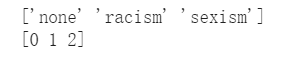

### Embeddings [Complete this section]

**Get Word List**

Get Word List的输出示例（由于下面的图片不是完整的打印结果，所以仅作格式参考。但格式很清楚。)

In [18]:
word_set = set() 
for sent in text_train_le:    #sentences
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set) 
word_list.sort()
print(word_list)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)


#'"

["'", "''", "'0xjared", "'17", "'absolutely", "'after", "'alihadi68", "'amberhasalamb", "'amohedin", "'anasmechch", "'and", "'antizholim", "'arab_fury", "'argh", "'argonblue", "'asem_1994", "'at", "'bahai144", "'benkuchera", "'bhamdailynews", "'biebervalue", "'blackopal80", "'bristolben", "'bruciebabe", "'burcucekmece", "'but", "'buttercupashby", "'can", "'celine", "'cemcfarland", "'channel7", "'christophheer52", "'chuckpfarrer", "'colin", "'come", "'cringing", "'curious", "'damnitscloudy", "'dankmtl", "'darchmare", "'darrenkopp", "'desertfox899", "'dianh4", "'did", "'directhex", "'discerningmumin", "'do", "'doammuslims", "'dont", "'edgeofthesandbx", "'eloisepeace", "'even", "'exposefalsehood", "'f3ew", "'farbenstau", "'finalbroadcast", "'floss", "'foodie_ben", "'freebsdglri", "'fuck", "'gbabeuf", "'glennf", "'go", "'goosenetworkusa", "'halalflaws", "'haroonstyles", "'having", "'hdmovieus", "'how", "'howtogetawaywithmurder", "'httptcofdylhlkdcv", "'httptcoltoxypkwww", "'httptcozjbwagvn

Sample output for Get Word List (Only for format reference since the following pic is not a full print result. But the format is clear to see.)

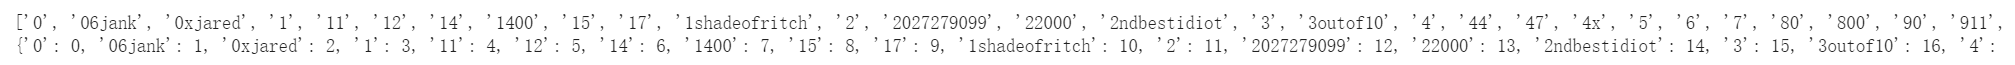

**padding and encoding [Please complete this section]**

In [ ]:
#给的
#转化句子到单词索引 convert the sentences--> word index
len_list = [len(s) for s in sentences] # 每句话的长度都是多少，然后设置成个list
seq_length = max(len_list)    #提取出最长的

def encode_and_add_padding(sentences, seq_length, word_index):#句子，最长的长度，不重复单词对应的索引
  sent_encoded = []
  for sent in sentences:
    temp_encoded = [word_index[word] for word in sent] #这是不添加PAD的时候的index索引，根据单词对应出来的
    if len(temp_encoded) < seq_length:
      temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))#word_index['[PAD]']取出括号里的index
    sent_encoded.append(temp_encoded)
  return sent_encoded

sent_encoded = encode_and_add_padding(sentences, seq_length, word_index)
print(sent_encoded)                       

In [22]:
# The sequence length is pre-defined, you can't change this value for this exercise
seq_length = 16

# Please Complete this function
# Hint: You should pay attention to: (1) if the sentence length > seq_length (2) if the word not in word_index dictionary
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in text_train_le:
      temp_encoded = [word_index[word] for word in sent]
      if len(temp_encoded) < seq_length:
        temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        sent_encoded.append(temp_encoded)
      elif len(temp_encoded) > seq_length:
        temp_encoded += [word_index['[UNKNOWN]']] * (len(temp_encoded) - seq_length)    #再找资料验证
        sent_encoded.append(temp_encoded)

    return sent_encoded

train_pad_encoded = encode_and_add_padding(text_train_le, seq_length, word_index )
test_pad_encoded = encode_and_add_padding(text_test_le, seq_length, word_index )

**Download Embeddings [Please complete this section]**

You can find the details from https://github.com/RaRe-Technologies/gensim-data

In [23]:
import gensim.downloader as api
word_emb_model = api.load("glove-twitter-50") # Download an embedding other than glove-twitter-25

[==================================================] 100.0% 199.5/199.5MB downloaded


**Get embeddings**

In [24]:
# Get the Embedding lookup table
import numpy as np
emb_dim = word_emb_model.vector_size

emb_table = []
for i, word in enumerate(word_list):
    if word in word_emb_model:
        emb_table.append(word_emb_model[word])
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)

### Model

In [25]:
vocab_size = len(word_list)
n_hidden = 50
total_epoch = 100
learning_rate = 0.01

In [26]:
import torch
#You can enable GPU here (cuda); or just CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        self.emb.weight.requires_grad = False
        self.lstm = nn.LSTM(emb_dim, n_hidden, num_layers=2, batch_first =True, dropout=0.2)
        self.linear = nn.Linear(n_hidden,n_class)

    def forward(self, x):
        x = self.emb(x)
        x,_ = self.lstm(x)
        x = self.linear(x[:,-1,:])
        return x


model = Model().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

input_torch = torch.from_numpy(np.array(train_pad_encoded)).to(device)  #1,6758
target_torch = torch.from_numpy(np.array(label_train_encoded)).view(-1).to(device)  #300


for epoch in range(total_epoch):  
    
    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch) 
    loss = criterion(outputs, target_torch)
    loss.backward()
    optimizer.step()
    
    if epoch%10 == 9:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),target_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')


ValueError: ignored

Sample output for model training (Only for format reference)

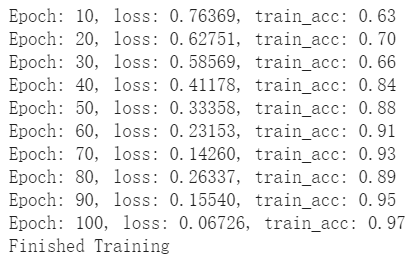

### Save and Load the model [Complete this section]

**Save the model [Complete this part]**

In [ ]:
#例子
#模型训练完要存了。 存在也给名为'filename.pt' 
torch.save(model, 'filename.pt')

In [27]:
torch.save(model,'lab5.pt')

**Load the model**

In [ ]:
#例子
#得跑完，存完，才能加载模型权重
the_saved_model = torch.load('filename.pt')
the_saved_model.eval() #展示出来eval

In [28]:
model2 = torch.load('lab5.pt')
model2.eval()

Model(
  (emb): Embedding(1722, 50)
  (lstm): LSTM(50, 50, num_layers=2, batch_first=True, dropout=0.2)
  (linear): Linear(in_features=50, out_features=3, bias=True)
)

### Testing

In [29]:
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

outputs = model2(input_torch) 
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
print(classification_report(label_test_encoded,predicted.cpu().numpy()))

ValueError: ignored

Sample output for Testing (Only for format reference)

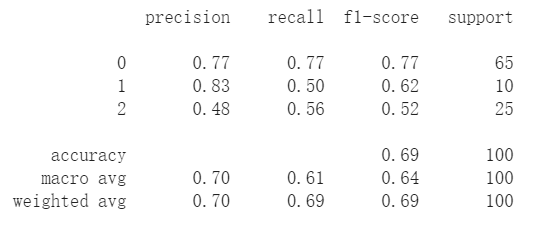